In [1]:
from matplotlib import pyplot as plt
import cv2 as cv
import numpy as np
import numpy as np
%matplotlib inline


In [2]:
def multipleImgShow(plts,titles,figSize=(12,12)):
    f, plots = plt.subplots(1,len(plts),figsize=figSize)
    for i in  range(len(plots)):
        plots[i].imshow(cv.cvtColor(plts[i],cv.COLOR_BGR2RGB))
        plots[i].set_title(titles[i])
        plots[i].axis('off')
    plt.show()


1 - square_circle 
    
    here we use dilation with two kernels (5,5) to increase the white space and decrease the black space:
    1 - square : keeps the shape of the white square while increasing its size and decreases the size of the black circle more than than the circle kernel and in an irregular way
    2- circle : makes the edges of the white square more round while increasing its size and decreases the black circle
    
    
- the increase in white space happens because of the dilation properties...
- the round edges of the circle kernel causes the edges of the white space to be more rounded the more iterations we use
- the high decrease rate of the black circle whie using the square kernel is because the area of the square is bigger than that of the circle 
- the irragularity in the black circle while using the square kernel is because the square has edges

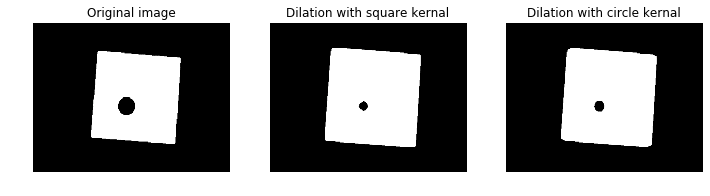

True

In [7]:
squareCircleImg = cv.cvtColor(cv.imread('input/Square-circle.png', 1), cv.COLOR_BGR2RGB)
square_dilation = cv.dilate(squareCircleImg, cv.getStructuringElement(cv.MORPH_RECT, (5,5)), iterations=3)
circle_dilation = cv.dilate(squareCircleImg, cv.getStructuringElement(cv.MORPH_ELLIPSE, (5,5)), iterations=3)
#imshow
imgs = [squareCircleImg, square_dilation, circle_dilation]
titles = ['Original image', 'Dilation with square kernal', 'Dilation with circle kernal']
multipleImgShow(imgs, titles)
cv.imwrite("output/square-circle-1.png", square_dilation)
cv.imwrite("output/square-circle-2.png", circle_dilation)

2 - cameraman

    black (pepper) noise decrease while white ones increase due to dilation

True

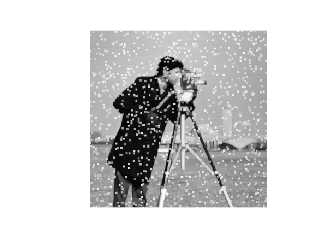

In [8]:
cameraManImg = cv.cvtColor(cv.imread('input/Cameraman.png', 1), cv.COLOR_BGR2RGB)
cameraman_denoised = cv.dilate(cameraManImg, cv.getStructuringElement(cv.MORPH_RECT, (3,3)), iterations=1)
plt.imshow(cameraman_denoised)
plt.axis('off')
cv.imwrite("output/cameraman-denoised.png", cameraman_denoised)

3 - Lady

    to detect aedges in an image using dilation...we increase the edges thickness using dilation then we subtract the orignal image from the one with thickened edges

True

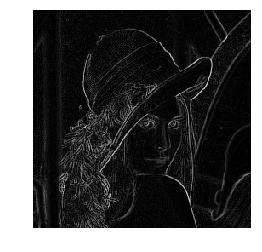

In [9]:
ladyImg = cv.cvtColor(cv.imread('input/lady.png', 1), cv.COLOR_BGR2RGB)
edge_detected = cv.dilate(ladyImg, cv.getStructuringElement(cv.MORPH_RECT, (3,3)), iterations=1)
edgedImg = edge_detected-ladyImg
plt.imshow(edgedImg)
plt.axis('off')
cv.imwrite("output/lady-edge.png", edgedImg)

4 - square_circle

here we use erosion with two kernels (5,5) to decrease the white space and increase the black space:
    1 - square : decreases the size of the white square and inccreases the size of the black circle more than than the circle kernel and in an irregular way
    2- circle : deccreases the size of the white square and increases the black circle
    
    
- the increase in black space happens because of the dilation properties...
- the high increase rate of the black circle whie using the square kernel is because the area of the square is bigger than that of the circle 
- the irragularity in the black circle while using the square kernel is because the square has edges

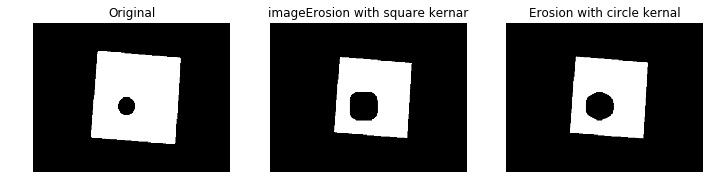

True

In [11]:
squareCircleImg = cv.cvtColor(cv.imread('input/Square-circle.png', 1), cv.COLOR_BGR2RGB)
square_eroded = cv.erode(squareCircleImg, cv.getStructuringElement(cv.MORPH_RECT, (5,5)), iterations=5)
circle_eroded = cv.erode(squareCircleImg, cv.getStructuringElement(cv.MORPH_ELLIPSE, (5,5)), iterations=5)

imgs = [squareCircleImg,square_eroded,circle_eroded]
titles = ['Original', 'imageErosion with square kernar','Erosion with circle kernal']
multipleImgShow(imgs,titles)

cv.imwrite("output/circle-square-erode-1.png", square_eroded)
cv.imwrite("output/circle-square-erode-2.png", circle_eroded)

5 - circles

    we change the picture into a black and white one then erode to increase the circumference of the disks and subtract it from the original image to get the circles

True

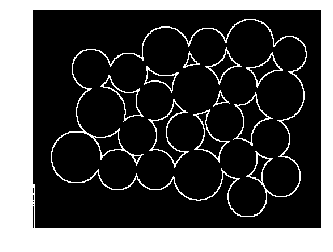

In [13]:
circleImg = cv.cvtColor(cv.imread('input/Circle.png', 1), cv.COLOR_BGR2RGB)
_,thresholded_img = cv.threshold(circleImg,120,255,cv.THRESH_BINARY)
circle_eroded = cv.erode(thresholded_img, cv.getStructuringElement(cv.MORPH_RECT, (5,5)), iterations=1)
plt.axis('off')
plt.imshow(thresholded_img-circle_eroded)
cv.imwrite("output/circle-erode.png", circle_eroded)

6 - cameraman

    white (salt) noise decrease while black ones increase due to erosion

True

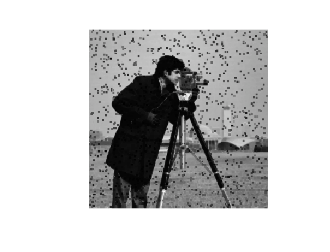

In [14]:
cameraManImg = cv.cvtColor(cv.imread('input/Cameraman.png', 1), cv.COLOR_BGR2RGB)
cameraman_eroded = cv.erode(cameraManImg, cv.getStructuringElement(cv.MORPH_RECT, (3,3)), iterations=1)
plt.axis('off')
plt.imshow(cameraman_eroded)
cv.imwrite("output/cameraman-erode.png", cameraman_eroded)

7 - (a) circles and lines 

    - we separate the circles alone in an image by using opening as the lines are thinner than the circles using 3 different kernels then subtract it from the original image to get the lines
    - the ellipse kernels give more round circles than the rectangle one
    - as the kernel size increases the circles become rounder and fewer
    - there is a drawback in that if the circles and the lines are connected together the output will be deformed
    - this can also be done by erosion then dilation to get the circles then subtracting the output from the original image to get the lines

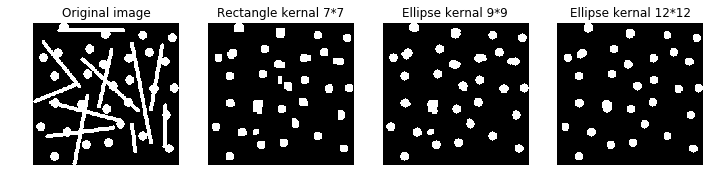

In [15]:
circleLinesImg = cv.cvtColor(cv.imread('input/Circle_and_Lines.png', 1), cv.COLOR_BGR2RGB)

circle_lines_open_rect = cv.morphologyEx(circleLinesImg, cv.MORPH_OPEN, cv.getStructuringElement(cv.MORPH_RECT, (7,7)))
circle_lines_open_elipse_1 = cv.morphologyEx(circleLinesImg, cv.MORPH_OPEN, cv.getStructuringElement(cv.MORPH_ELLIPSE, (9,9)))
circle_lines_open_elipse_2 = cv.morphologyEx(circleLinesImg, cv.MORPH_OPEN, cv.getStructuringElement(cv.MORPH_ELLIPSE, (12,12)))

imgs = [circleLinesImg,circle_lines_open_rect,circle_lines_open_elipse_1,circle_lines_open_elipse_2]
titles = ['Original image', 'Rectangle kernal 7*7','Ellipse kernal 9*9','Ellipse kernal 12*12']
multipleImgShow(imgs,titles)


7 - (b) circles and lines

    - here instead of subtracting to get the lines we use vertical, horizontal and diagonal strucuring elements to get the lines image alone
    - we then use the connected elements function to count the circles in the circles image and the lines in the lines image

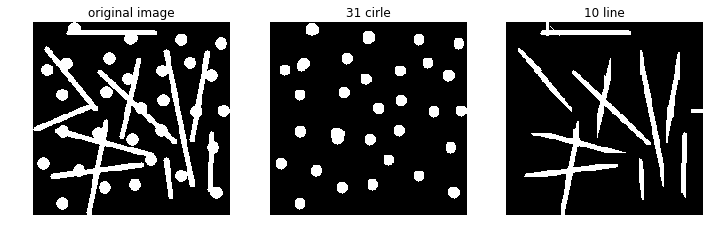

True

In [18]:
circleLinesImg = cv.imread('input/Circle_and_Lines.png', 0)


squareSE_V = cv.getStructuringElement(cv.MORPH_RECT,(1,24))
squareSE_H = cv.getStructuringElement(cv.MORPH_RECT,(24,1))
squareSE_45 = np.eye(24,dtype = np.uint8)
circleSE = cv.getStructuringElement(cv.MORPH_ELLIPSE,(12,12))


circles = cv.morphologyEx(circleLinesImg,cv.MORPH_OPEN,circleSE)


linesOpen45 = cv.morphologyEx(circleLinesImg,cv.MORPH_OPEN,squareSE_45)
linesOpenV = cv.morphologyEx(circleLinesImg,cv.MORPH_OPEN,squareSE_V)
linesOpenH = cv.morphologyEx(circleLinesImg,cv.MORPH_OPEN,squareSE_H)
linesTotal = linesOpen45 + linesOpenV + linesOpenH 

s1,p1= cv.connectedComponents(circles)
s2,p2= cv.connectedComponents(linesTotal)

imgs = [circleLinesImg,circles,linesTotal]
titles = ['original image', str(s1)+' cirle', str(s2)+' line']
multipleImgShow(imgs, titles)
cv.imwrite("output/circle.png", circles)
cv.imwrite("output/line.png", linesTotal)

12? - morning with evining background

    - threshold the morning image 
    - get the white space in the thresholded image 
    - replace these places with the evening image
    
    - we may use erosion to make it clearer but some details like the power lines will disappear

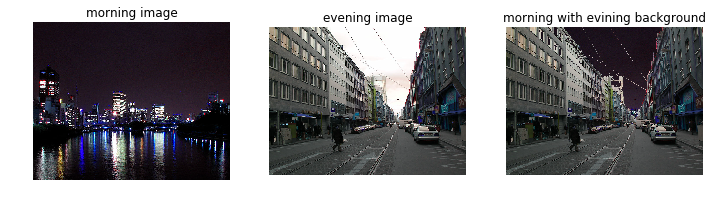

In [21]:
eveningImg = cv.cvtColor(cv.imread('input/evening.jpg', 1), cv.COLOR_BGR2RGB)
morningImg = cv.cvtColor(cv.imread('input/morning.jpg', 1), cv.COLOR_BGR2RGB)
origMorning = morningImg.copy()
_,thresholded_img = cv.threshold(morningImg,200,255,cv.THRESH_BINARY)
eroded_morning=cv.erode(thresholded_img, cv.getStructuringElement(cv.MORPH_RECT, (3,3)), iterations=6)
dilated_morning=cv.dilate(eroded_morning, cv.getStructuringElement(cv.MORPH_RECT, (3,3)), iterations=6)


background =[]
for i in range(morningImg.shape[0]):
    for j in range(morningImg.shape[1]):
        if thresholded_img[i,j,0] == 255:
            background.append((i,j))

for i in background:
    if i[1]>800:
        continue
    morningImg[i[0],i[1]]=eveningImg[i[0],i[1]]

imgs = [eveningImg, origMorning, morningImg ]
titles = ['morning image', 'evening image', 'morning with evining background']
multipleImgShow(imgs, titles)


13? - coins

    - threshold
    - erode until just the 50$ coins remain
    - subtract from the original image to get the 25$ coins
    
    - use connected components to get the number of coins in each image then add them to get the output
    
    
    - we can generalize the concept by always eroding the image till only the biggest coins remain then subtracting it from the original image to get the image with the rest of the coins and then doing erosion again and so on

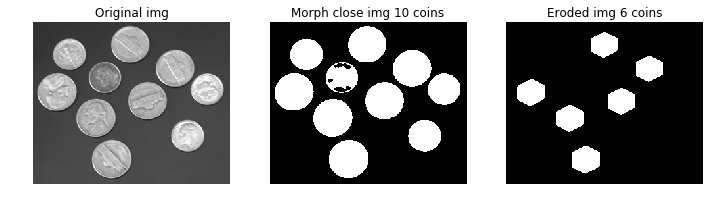

$50 * 6 + $25 * 4 = 400 $


In [22]:
coinsImg = cv.imread('input/coins.png', 0)
_,thresholded_img = cv.threshold(coinsImg,120,255,cv.THRESH_BINARY)
morph_close = cv.morphologyEx(thresholded_img,cv.MORPH_CLOSE,cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5)))
eroded_img = cv.erode(morph_close, cv.getStructuringElement(cv.MORPH_ELLIPSE, (6,6)), iterations=9)
dilated_img = cv.dilate(eroded_img, cv.getStructuringElement(cv.MORPH_ELLIPSE, (5,5)), iterations=9)

s1,p1= cv.connectedComponents(morph_close)
s2,p2= cv.connectedComponents(dilated_img)

imgs = [coinsImg, morph_close, dilated_img ]
titles = ['Original img','Morph close img '+str(s1-1)+' coins', 'Eroded img '+ str(s2-1)+' coins']
multipleImgShow(imgs,titles)

print('$50 *',s2-1, '+ $25 *', s1-s2, '=', (s2-1)*50+(s1-s2)*25, '$' )

                                                 BONUS

13 - Leaves


    - assuming that all images are of the same size and that the leaves are also of nearly the same size and are centered in their respective images 
    
    - subtract every pixel alone between the test and the training image in all three red, green and blue layers, then square the result to make it positive
    
    - we can then add all the errors of the pixels together and then scale the answer to 100% or to 1
    
    - subtract from 100 or 1 to get the similarity

8 - skeleton

    - we can close by all types of kernels then subtract from original image like the example below
    - as the structring element size incresaes the skeleton size increases
    
    - we can find the center of the skeleton by finding the first white pixel from the right on any height and the first one on the left then adding them and dividing by 2...we do the same from the top and bottom of the image 
    - the center is the point which satisfy both
    
    - the area can be known by counting the white pixels in the original image or by approximating the skeleton into a rectangle with the dimensions of the former point

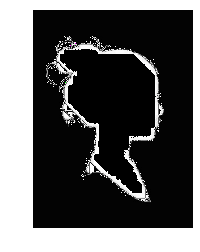

In [59]:
girl = cv.cvtColor(cv.imread('input/Girl.png', 1), cv.COLOR_BGR2RGB)
girl_close= cv.morphologyEx(girl,cv.MORPH_CLOSE,squareSE_V)
girl_close += cv.morphologyEx(girl,cv.MORPH_CLOSE,squareSE_H)
girl_close += cv.morphologyEx(girl,cv.MORPH_CLOSE,squareSE_45)
girl_close += cv.morphologyEx(girl,cv.MORPH_CLOSE,circleSE)



plt.axis('off')
plt.imshow(girl - girl_close)


9 - Hit and Miss

    - to find the isolated points in an image we use a kernel (3,3) with a 1 at the center and -1 anywhere else
    - to find the junction points in an image we use a kernel (3,3) or (5,5) or more with a cross of 1's vertical and horizontal or diagonals... with -1 everywhere else if we want a simple junction only or with zeros if we want any shape that contains a junction
    - as the filter size increases the filtering will be harsher